# Learning from Pandas Official Document

In [1]:
%matplotlib inline
import numpy as np
import numpy.ma as ma
import pandas as pd
from pandas import DataFrame, Series
import matplotlib.pyplot as plt
import seaborn as sns
import timeit
import line_profiler

In [2]:
titanic = pd.read_csv('data/titanic.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df = DataFrame({
    'Dimensions':[1,2],
    'Name':['Series', 'DataFrame'],
    'Description':['1D labeled homogeneously-typed array',
                  'General 2D labeled, size-mutable tabular structure with potentially heterogeneously-typed column']
})
df

,Dimensions,Name,Description
0,1,Series,1D labeled homogeneously-typed array
1,2,DataFrame,"General 2D labeled, size-mutable tabular struc..."


In [4]:
df = pd.DataFrame({
    'Names' : ['Ramesh Kumar', 'Suresh Kumar', 'Rupesh Kumar'],
    'Age' : [22, 35, 58],
    'Sex' : ['male', 'male', 'female']
})
df

,Names,Age,Sex
0,Ramesh Kumar,22,male
1,Suresh Kumar,35,male
2,Rupesh Kumar,58,female


In [5]:
ages = pd.Series([22, 35, 58])
ages

0    22
1    35
2    58
dtype: int64

In [6]:
df['Age'].max()

58

In [7]:
ages.max()

58

In [8]:
df.describe()

,Age
count,3.000000
mean,38.333333
std,18.230012
min,22.000000
25%,28.500000
50%,35.000000
75%,46.500000
max,58.000000


In [10]:
titanic.head(8)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S


In [11]:
titanic.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [3]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [15]:
ages = titanic['Age']
ages.head()

0    34.5
1    47.0
2    62.0
3    27.0
4    22.0
Name: Age, dtype: float64

In [16]:
type(titanic['Age']) # pandas.core.series.Series

pandas.core.series.Series

In [4]:
titanic['Age'].shape # (891,)

(891,)

In [5]:
titanic.shape # (891, 12)

(891, 12)

In [6]:
age_sex = titanic[['Age', 'Sex']]
age_sex.head()
type(age_sex) # pandas.core.frame.DataFrame
age_sex.shape # (891, 2)

(891, 2)

In [29]:
above_35 = titanic[titanic['Age'] > 35]
above_35.head()
above_35.shape # (105, 11)

(105, 11)

In [28]:
(titanic['Age']>35).head()

0    False
1     True
2     True
3    False
4    False
Name: Age, dtype: bool

In [32]:
class_23 = titanic[titanic['Pclass'].isin([2,3])]
class_23.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [37]:
class_32 = titanic[(titanic['Pclass'] == 2 ) | (titanic['Pclass'] == 3 )]


False

In [7]:
age_not_na = titanic[titanic['Age'].notna()]
age_not_na.shape # (714, 12)

(714, 12)

In [46]:
adult_names = titanic.loc[titanic['Age']>35, 'Name']
adult_names.head()     

1                      Wilkes, Mrs. James (Ellen Needs)
2                             Myles, Mr. Thomas Francis
11                           Jones, Mr. Charles Cresson
13                                 Howard, Mr. Benjamin
14    Chaffee, Mrs. Herbert Fuller (Carrie Constance...
Name: Name, dtype: object

In [47]:
titanic.iloc[9:25, 2:5]

,Name,Sex,Age
9,"Davies, Mr. John Samuel",male,21.0
10,"Ilieff, Mr. Ylio",male,NaN
11,"Jones, Mr. Charles Cresson",male,46.0
12,"Snyder, Mrs. John Pillsbury (Nelle Stevenson)",female,23.0
13,"Howard, Mr. Benjamin",male,63.0
14,"Chaffee, Mrs. Herbert Fuller (Carrie Constance...",female,47.0
15,"del Carlo, Mrs. Sebastiano (Argenia Genovesi)",female,24.0
16,"Keane, Mr. Daniel",male,35.0
17,"Assaf, Mr. Gerios",male,21.0
18,"Ilmakangas, Miss. Ida Livija",female,27.0


In [55]:
titanic.iloc[:3,2] = 'anonymous'
titanic

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,anonymous,anonymous,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,anonymous,anonymous,47.0,1,0,363272,7.0000,NaN,S
2,894,2,anonymous,anonymous,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [58]:
titanic.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# NO2 air quality index data - https://openaq.org/#/projects?page=1&parameters=7 

In [8]:
air_quality = pd.read_csv("data/air_quality_no2.csv", index_col=0, parse_dates=True)
air_quality.head()

,station_antwerp,station_paris,station_london
datetime,,,
2019-05-07 02:00:00,NaN,NaN,23.0
2019-05-07 03:00:00,50.5,25.0,19.0
2019-05-07 04:00:00,45.0,27.7,19.0
2019-05-07 05:00:00,NaN,50.4,16.0
2019-05-07 06:00:00,NaN,61.9,NaN


In [9]:
air_quality.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1035 entries, 2019-05-07 02:00:00 to 2019-06-21 02:00:00
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   station_antwerp  95 non-null     float64
 1   station_paris    1004 non-null   float64
 2   station_london   969 non-null    float64
dtypes: float64(3)
memory usage: 32.3 KB


In [10]:
air_quality.shape

(1035, 3)

<AxesSubplot:xlabel='datetime'>

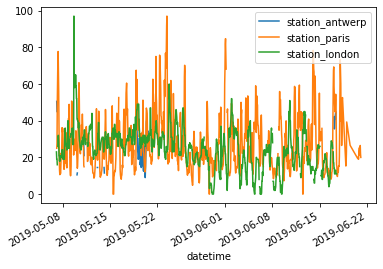

In [11]:
air_quality.plot()

<AxesSubplot:xlabel='datetime'>

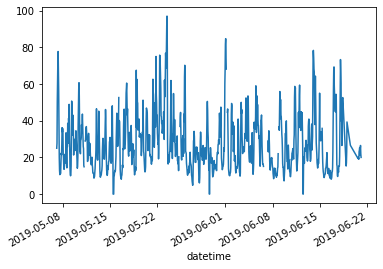

In [12]:
air_quality['station_paris'].plot()

<AxesSubplot:xlabel='station_london', ylabel='station_paris'>

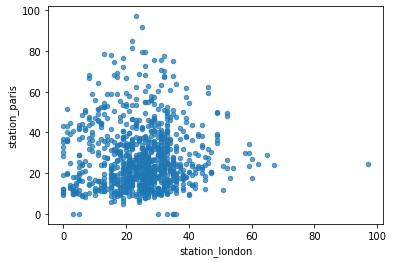

In [18]:
air_quality.plot.scatter(x='station_london', y='station_paris', alpha=0.7)

In [19]:
[
    method_name
    for method_name in dir(air_quality.plot)
    if not method_name.startswith("_")
]

['area',
 'bar',
 'barh',
 'box',
 'density',
 'hexbin',
 'hist',
 'kde',
 'line',
 'pie',
 'scatter']

<AxesSubplot:>

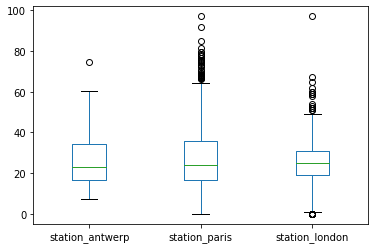

In [25]:
air_quality.plot.box()

In [26]:
air_quality.describe()

,station_antwerp,station_paris,station_london
count,95.000000,1004.000000,969.000000
mean,25.778947,27.740538,24.777090
std,12.682019,15.285746,11.214377
min,7.500000,0.000000,0.000000
25%,16.750000,16.500000,19.000000
50%,23.000000,24.150000,25.000000
75%,34.500000,35.925000,31.000000
max,74.500000,97.000000,97.000000


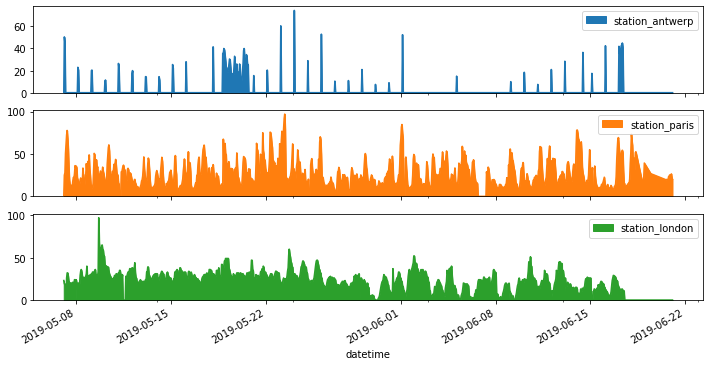

In [31]:
axs = air_quality.plot.area(figsize=(12,6) , subplots=True)

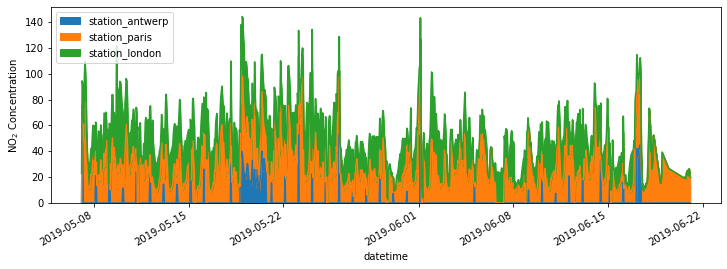

In [39]:
fig, axs = plt.subplots(figsize = (12, 4))
air_quality.plot.area(ax=axs)
axs.set_ylabel('NO$_2$ Concentration')
fig.savefig("no2_concentration.png")

In [41]:
air_quality['london_mg_per_cubic'] = air_quality['station_london']*1.882
air_quality.head()

,station_antwerp,station_paris,station_london,london_mg_per_cubic
datetime,,,,
2019-05-07 02:00:00,NaN,NaN,23.0,43.286
2019-05-07 03:00:00,50.5,25.0,19.0,35.758
2019-05-07 04:00:00,45.0,27.7,19.0,35.758
2019-05-07 05:00:00,NaN,50.4,16.0,30.112
2019-05-07 06:00:00,NaN,61.9,NaN,NaN


In [43]:
air_quality['ratio_paris_antwerp'] = (
    air_quality['station_paris'] / air_quality['station_antwerp']
)
air_quality.head()

,station_antwerp,station_paris,station_london,london_mg_per_cubic,ratio_paris_antwerp
datetime,,,,,
2019-05-07 02:00:00,NaN,NaN,23.0,43.286,NaN
2019-05-07 03:00:00,50.5,25.0,19.0,35.758,0.495050
2019-05-07 04:00:00,45.0,27.7,19.0,35.758,0.615556
2019-05-07 05:00:00,NaN,50.4,16.0,30.112,NaN
2019-05-07 06:00:00,NaN,61.9,NaN,NaN,NaN


In [44]:
air_quality_renamed = air_quality.rename(
    columns={
        'station_antwerp': 'BETR801',
        "station_paris": "FR04014",
        "station_london": "London Westminster",
    }
)
air_quality_renamed.head()

,BETR801,FR04014,London Westminster,london_mg_per_cubic,ratio_paris_antwerp
datetime,,,,,
2019-05-07 02:00:00,NaN,NaN,23.0,43.286,NaN
2019-05-07 03:00:00,50.5,25.0,19.0,35.758,0.495050
2019-05-07 04:00:00,45.0,27.7,19.0,35.758,0.615556
2019-05-07 05:00:00,NaN,50.4,16.0,30.112,NaN
2019-05-07 06:00:00,NaN,61.9,NaN,NaN,NaN


In [45]:
air_quality_renamed = air_quality_renamed.rename(columns=str.lower)
air_quality_renamed.head()

,betr801,fr04014,london westminster,london_mg_per_cubic,ratio_paris_antwerp
datetime,,,,,
2019-05-07 02:00:00,NaN,NaN,23.0,43.286,NaN
2019-05-07 03:00:00,50.5,25.0,19.0,35.758,0.495050
2019-05-07 04:00:00,45.0,27.7,19.0,35.758,0.615556
2019-05-07 05:00:00,NaN,50.4,16.0,30.112,NaN
2019-05-07 06:00:00,NaN,61.9,NaN,NaN,NaN


# How to calculate summary statistics?

In [46]:
titanic = pd.read_csv('data/titanic.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [47]:
titanic['Age'].mean() # 29.699

29.69911764705882

In [48]:
titanic[['Age', 'Fare']].median()

Age     28.0000
Fare    14.4542
dtype: float64

In [49]:
titanic[['Age', 'Fare']].describe()

,Age,Fare
count,714.000000,891.000000
mean,29.699118,32.204208
std,14.526497,49.693429
min,0.420000,0.000000
25%,20.125000,7.910400
50%,28.000000,14.454200
75%,38.000000,31.000000
max,80.000000,512.329200


In [62]:
titanic.agg({
    'Age':['min', 'max', 'median', 'skew', 'mean'],
    'Fare':['min', 'max', 'median', 'skew', 'mean', 'std'],
})

,Age,Fare
min,0.420000,0.000000
max,80.000000,512.329200
median,28.000000,14.454200
skew,0.389108,4.787317
mean,29.699118,32.204208
std,NaN,49.693429


In [60]:
%timeit titanic[['Sex','Age']].groupby('Sex').mean()

2.41 ms ± 282 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [55]:
titanic.groupby('Sex').mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Sex,,,,,,,
female,431.028662,0.742038,2.159236,27.915709,0.694268,0.649682,44.479818
male,454.147314,0.188908,2.389948,30.726645,0.429809,0.235702,25.523893


In [59]:
%timeit titanic.groupby('Sex')['Age'].mean()

801 µs ± 45.4 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [73]:
titanic.groupby(['Sex', 'Pclass'])['Fare'].mean()

Sex     Pclass
female  1         106.125798
        2          21.970121
        3          16.118810
male    1          67.226127
        2          19.741782
        3          12.661633
Name: Fare, dtype: float64

In [77]:
%timeit titanic.Pclass.value_counts() # 389 µs ± 44.5 µs per loop

389 µs ± 44.5 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [79]:
titanic.groupby('Pclass')['Pclass'].size() # 530 µs ± 38.6 µs per loop

Pclass
1    216
2    184
3    491
Name: Pclass, dtype: int64

# HOW TO RESHAPE THE LAYOUT OF TABLES?

In [84]:
air_quality = pd.read_csv('data/air_quality_long.csv', index_col='date.utc', parse_dates=True) # date.utc is a column in dataset
air_quality.head()

,city,country,location,parameter,value,unit
date.utc,,,,,,
2019-06-18 06:00:00+00:00,Antwerpen,BE,BETR801,pm25,18.0,µg/m³
2019-06-17 08:00:00+00:00,Antwerpen,BE,BETR801,pm25,6.5,µg/m³
2019-06-17 07:00:00+00:00,Antwerpen,BE,BETR801,pm25,18.5,µg/m³
2019-06-17 06:00:00+00:00,Antwerpen,BE,BETR801,pm25,16.0,µg/m³
2019-06-17 05:00:00+00:00,Antwerpen,BE,BETR801,pm25,7.5,µg/m³


In [96]:
titanic.sort_values(by=['Pclass','Age'], ascending=False).head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,NaN,S
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q
280,281,0,3,"Duane, Mr. Frank",male,65.0,0,0,336439,7.7500,NaN,Q
483,484,1,3,"Turkula, Mrs. (Hedwig)",female,63.0,0,0,4134,9.5875,NaN,S
326,327,0,3,"Nysveen, Mr. Johan Hansen",male,61.0,0,0,345364,6.2375,NaN,S


In [98]:
no2 = air_quality[air_quality['parameter'] == 'no2']
no2.head()

,city,country,location,parameter,value,unit
date.utc,,,,,,
2019-06-21 00:00:00+00:00,Paris,FR,FR04014,no2,20.0,µg/m³
2019-06-20 23:00:00+00:00,Paris,FR,FR04014,no2,21.8,µg/m³
2019-06-20 22:00:00+00:00,Paris,FR,FR04014,no2,26.5,µg/m³
2019-06-20 21:00:00+00:00,Paris,FR,FR04014,no2,24.9,µg/m³
2019-06-20 20:00:00+00:00,Paris,FR,FR04014,no2,21.4,µg/m³


In [99]:
no2_subset = no2.sort_index().groupby(['location']).head(2)
no2_subset

,city,country,location,parameter,value,unit
date.utc,,,,,,
2019-04-09 01:00:00+00:00,Antwerpen,BE,BETR801,no2,22.5,µg/m³
2019-04-09 01:00:00+00:00,Paris,FR,FR04014,no2,24.4,µg/m³
2019-04-09 02:00:00+00:00,London,GB,London Westminster,no2,67.0,µg/m³
2019-04-09 02:00:00+00:00,Antwerpen,BE,BETR801,no2,53.5,µg/m³
2019-04-09 02:00:00+00:00,Paris,FR,FR04014,no2,27.4,µg/m³
2019-04-09 03:00:00+00:00,London,GB,London Westminster,no2,67.0,µg/m³


In [106]:
%timeit no2_subset.pivot(columns='location', values='value') # 2.34 ms ± 306 µs per loop

2.34 ms ± 306 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [107]:
%timeit no2_subset.pivot(columns='location')['value'] # 5.6 ms ± 204 µs per loop

5.6 ms ± 204 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [108]:
no2 = air_quality[air_quality['parameter'] == 'no2']
no2.head()

,city,country,location,parameter,value,unit
date.utc,,,,,,
2019-06-21 00:00:00+00:00,Paris,FR,FR04014,no2,20.0,µg/m³
2019-06-20 23:00:00+00:00,Paris,FR,FR04014,no2,21.8,µg/m³
2019-06-20 22:00:00+00:00,Paris,FR,FR04014,no2,26.5,µg/m³
2019-06-20 21:00:00+00:00,Paris,FR,FR04014,no2,24.9,µg/m³
2019-06-20 20:00:00+00:00,Paris,FR,FR04014,no2,21.4,µg/m³


<AxesSubplot:xlabel='date.utc'>

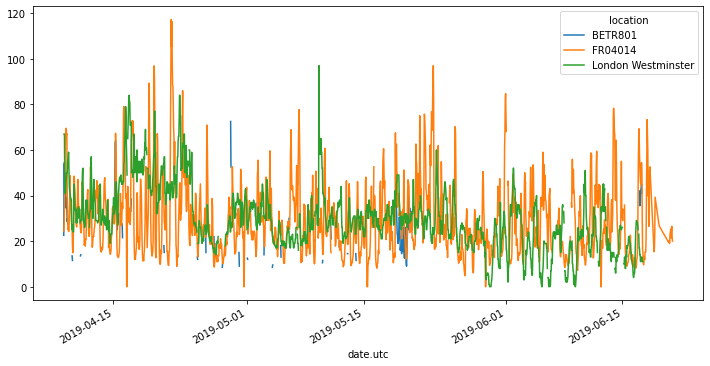

In [113]:
no2.pivot(columns='location', values='value').plot(figsize = (12, 6))

In [114]:
air_quality = pd.read_csv('data/air_quality_long.csv', index_col='date.utc', parse_dates=True) # date.utc is a column in dataset
air_quality.head()

,city,country,location,parameter,value,unit
date.utc,,,,,,
2019-06-18 06:00:00+00:00,Antwerpen,BE,BETR801,pm25,18.0,µg/m³
2019-06-17 08:00:00+00:00,Antwerpen,BE,BETR801,pm25,6.5,µg/m³
2019-06-17 07:00:00+00:00,Antwerpen,BE,BETR801,pm25,18.5,µg/m³
2019-06-17 06:00:00+00:00,Antwerpen,BE,BETR801,pm25,16.0,µg/m³
2019-06-17 05:00:00+00:00,Antwerpen,BE,BETR801,pm25,7.5,µg/m³


In [116]:
air_quality.pivot_table(columns='parameter', values='value', index='location', aggfunc='mean')

parameter,no2,pm25
location,,
BETR801,26.950920,23.169492
FR04014,29.374284,NaN
London Westminster,29.740050,13.443568


In [118]:
air_quality.pivot_table(columns='parameter', values='value', 
                        index='location', aggfunc='mean', margins=True,)

parameter,no2,pm25,All
location,,,
BETR801,26.950920,23.169492,24.982353
FR04014,29.374284,NaN,29.374284
London Westminster,29.740050,13.443568,21.491708
All,29.430316,14.386849,24.222743


In [124]:
air_quality.groupby(['parameter', 'location']).mean()

value
parameter location                     
no2       BETR801             26.950920
          FR04014             29.374284
          London Westminster  29.740050
pm25      BETR801             23.169492
          London Westminster  13.443568